# Counterfeit detection

The task in this assignment is to detect the  counterfeit banknotes. The data set is based on [banknote authentication Data Set ](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#) from UCI Machine Learning repository. The first three columns denote different parameters obtained from the photographs of the banknotes and last colum provides the label. Frankly as the dataset does not have any description I don't know  which labels corresponds to real and which to counterfeited banknotes. let's assume that label one (positive) denotes the clounterfeits. The set  [banknote_authentication.csv](./data/banknote_authentication.csv) can be found in the `data`  directory.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
import  matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8)

Please insert you  firstname  and name below

In [4]:
from  sklearn.model_selection import train_test_split
seed = 31287

In [5]:
data = pd.read_csv('data/banknotes_data.csv')

In [6]:
data.head()

,a0,a1,a2,a3,counterfeit
0,-1.1306,1.8458,-1.35750,-1.38060,1
1,-1.1188,3.3357,-1.34550,-1.95730,1
2,2.6719,3.0646,0.37158,0.58619,0
3,-4.1409,3.4619,-0.47841,-3.88790,1
4,1.4507,8.7903,-2.23240,-0.65259,0


In [7]:
data.describe()

,a0,a1,a2,a3,counterfeit
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,0.431116,1.902054,1.426607,-1.220393,0.444254
std,2.845672,5.942260,4.397341,2.101777,0.497096
min,-7.042100,-13.773100,-5.286100,-7.871900,0.000000
25%,-1.770900,-1.916200,-1.664300,-2.466150,0.000000
50%,0.471345,2.408650,0.567365,-0.614450,0.000000
75%,2.816925,6.800675,3.338825,0.394810,1.000000
max,6.824800,12.730200,17.927400,2.449500,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a0           1166 non-null   float64
 1   a1           1166 non-null   float64
 2   a2           1166 non-null   float64
 3   a3           1166 non-null   float64
 4   counterfeit  1166 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 45.7 KB


In [9]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, stratify=data.loc[:,'counterfeit'], random_state=seed)

In [10]:
data_train

,a0,a1,a2,a3,counterfeit
711,1.94760,-4.773800,8.52700,-1.866800,0
565,1.42760,8.384700,-2.09950,-1.967700,0
912,-4.28590,8.523400,3.13920,-0.916390,0
64,4.92490,0.689060,0.77344,1.209500,0
871,2.19480,1.378100,1.15820,0.857740,0
...,...,...,...,...,...
47,-2.45610,-4.556600,6.45340,-0.056479,1
1161,1.21380,8.798600,-2.16720,-0.741820,0
174,5.87820,5.940900,-2.85440,-0.608630,0
1119,0.17346,7.869500,0.26876,-3.788300,0


In [11]:
lbls_train = data_train['counterfeit']
lbls_test = data_test['counterfeit']

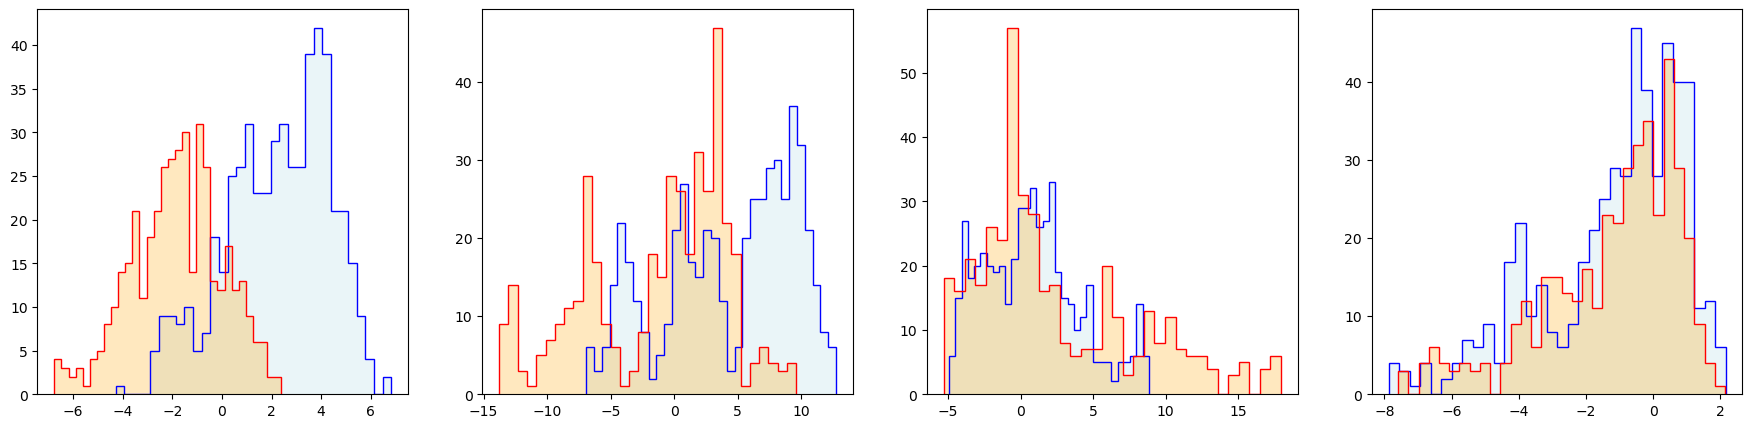

In [12]:
fig, ax = plt.subplots(1,4, figsize=(22,5))
for i in range(4):
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='step', color='blue')
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='step', color='red')
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='bar', color='lightblue', alpha=0.25)
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='bar', color='orange', alpha =0.25)

## Problem 1

Using  the [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) function construct the  Gaussian  Bayes classifier using only one feature. Which feature will you choose? Calculate the confusion matrix (normalized as to show rates), ROC AUC score and plot ROC curve. Do this both for training and validation set. Plot both curves on the same plot.  

In [13]:
from sklearn.naive_bayes import GaussianNB

__Hint__ For calculating metrics and plotting ROC curves you may use functions from scikit-learn: `roc_curve`, `roc_auc_score` and `confusion matrix`. For estimating normal distribution parameters  use `norm.fit` `from scipy.stats`. Use `norm.pdf` for normal probability density function.

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

Which feature did you choose?

In [15]:
# Choose the feature (let's assume it's the first one for now)
feature_idx = 0
feature_train = data_train.iloc[:, feature_idx].values.reshape(-1, 1)
feature_test = data_test.iloc[:, feature_idx].values.reshape(-1, 1)

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(feature_train, lbls_train)


GaussianNB()

Training set confusion matrix:
 [[0.85328185 0.14671815]
 [0.17149758 0.82850242]]
Training set ROC AUC score: 0.921726073899987
Test set confusion matrix:
 [[0.87692308 0.12307692]
 [0.18269231 0.81730769]]
Test set ROC AUC score: 0.9442677514792899


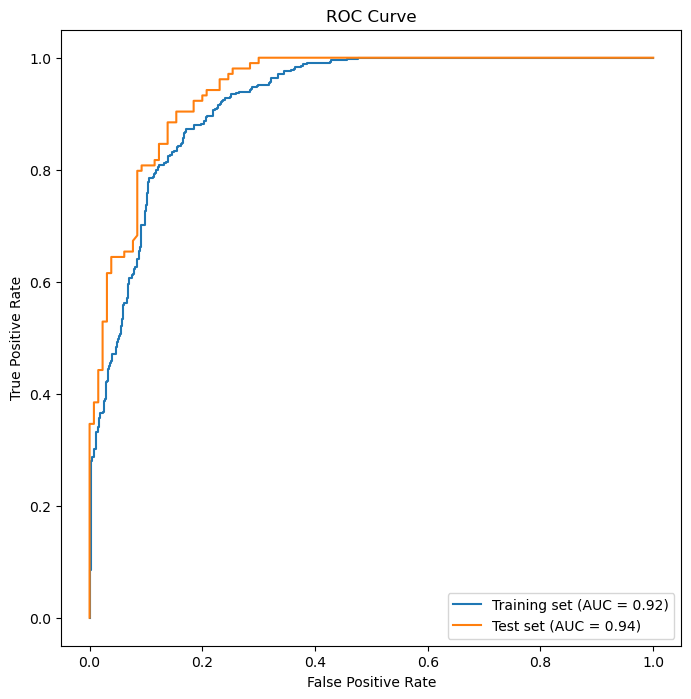

In [16]:
# Predict and evaluate on training set
train_preds = gnb.predict(feature_train)
train_probs = gnb.predict_proba(feature_train)[:, 1]

# Predict and evaluate on test set
test_preds = gnb.predict(feature_test)
test_probs = gnb.predict_proba(feature_test)[:, 1]

# Calculate and display confusion matrix and ROC AUC score for training set
train_conf_matrix = confusion_matrix(lbls_train, train_preds, normalize='true')
train_roc_auc = roc_auc_score(lbls_train, train_probs)
train_fpr, train_tpr, _ = roc_curve(lbls_train, train_probs)

# Calculate and display confusion matrix and ROC AUC score for test set
test_conf_matrix = confusion_matrix(lbls_test, test_preds, normalize='true')
test_roc_auc = roc_auc_score(lbls_test, test_probs)
test_fpr, test_tpr, _ = roc_curve(lbls_test, test_probs)

print("Training set confusion matrix:\n", train_conf_matrix)
print("Training set ROC AUC score:", train_roc_auc)
print("Test set confusion matrix:\n", test_conf_matrix)
print("Test set ROC AUC score:", test_roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(train_fpr, train_tpr, label=f'Training set (AUC = {train_roc_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test set (AUC = {test_roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [17]:
data_train

,a0,a1,a2,a3,counterfeit
711,1.94760,-4.773800,8.52700,-1.866800,0
565,1.42760,8.384700,-2.09950,-1.967700,0
912,-4.28590,8.523400,3.13920,-0.916390,0
64,4.92490,0.689060,0.77344,1.209500,0
871,2.19480,1.378100,1.15820,0.857740,0
...,...,...,...,...,...
47,-2.45610,-4.556600,6.45340,-0.056479,1
1161,1.21380,8.798600,-2.16720,-0.741820,0
174,5.87820,5.940900,-2.85440,-0.608630,0
1119,0.17346,7.869500,0.26876,-3.788300,0


## Problem 2

Same as Problem 1 but now construct Gaussian Naive Bayes using two features. Additionally  compare ROC curve obtained with this and previous  classifier on the test set. What is the improvement of AUC score on the test set?

In [18]:
# Choose two features (assuming we use the first two for now)
features_train = data_train.iloc[:, :2].values
features_test = data_test.iloc[:, :2].values

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(features_train, lbls_train)


GaussianNB()

ROC AUC score with one feature - Training set: 0.921726073899987
ROC AUC score with one feature - Test set: 0.9442677514792899
ROC AUC score with two features - Training set: 0.9499748195400369
ROC AUC score with two features - Test set: 0.9637573964497042


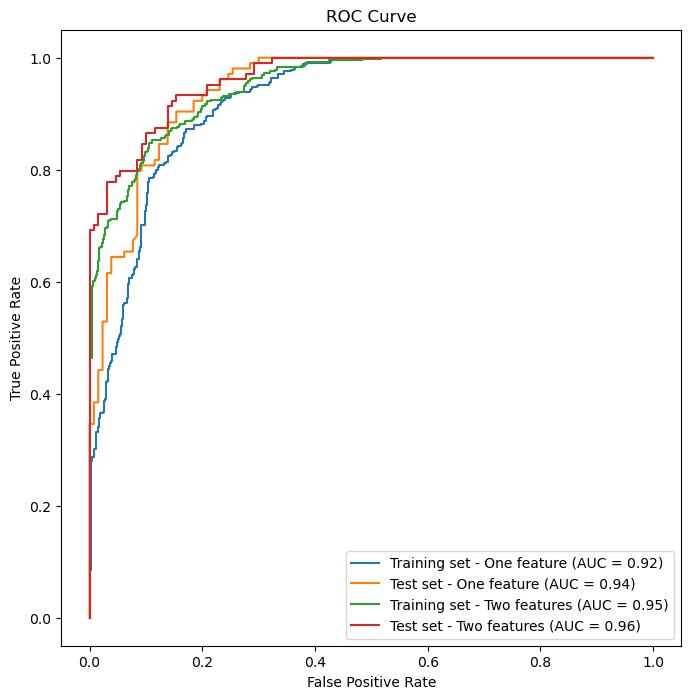

In [19]:
# Predict and evaluate on training set
train_preds = gnb.predict(features_train)
train_probs = gnb.predict_proba(features_train)[:, 1]

# Predict and evaluate on test set
test_preds = gnb.predict(features_test)
test_probs = gnb.predict_proba(features_test)[:, 1]

# Calculate and display confusion matrix and ROC AUC score for training set
train_conf_matrix = confusion_matrix(lbls_train, train_preds, normalize='true')
train_roc_auc = roc_auc_score(lbls_train, train_probs)
train_fpr, train_tpr, _ = roc_curve(lbls_train, train_probs)

# Calculate and display confusion matrix and ROC AUC score for test set
test_conf_matrix = confusion_matrix(lbls_test, test_preds, normalize='true')
test_roc_auc = roc_auc_score(lbls_test, test_probs)
test_fpr, test_tpr, _ = roc_curve(lbls_test, test_probs)

# Initialize and train the Gaussian Naive Bayes classifier using one feature
gnb_one_feature = GaussianNB()
gnb_one_feature.fit(features_train[:, :1], lbls_train)
train_probs_one_feature = gnb_one_feature.predict_proba(features_train[:, :1])[:, 1]
test_probs_one_feature = gnb_one_feature.predict_proba(features_test[:, :1])[:, 1]
train_roc_auc_one_feature = roc_auc_score(lbls_train, train_probs_one_feature)
test_roc_auc_one_feature = roc_auc_score(lbls_test, test_probs_one_feature)
train_fpr_one_feature, train_tpr_one_feature, _ = roc_curve(lbls_train, train_probs_one_feature)
test_fpr_one_feature, test_tpr_one_feature, _ = roc_curve(lbls_test, test_probs_one_feature)

# Initialize and train the Gaussian Naive Bayes classifier using two features
gnb_two_features = GaussianNB()
gnb_two_features.fit(features_train, lbls_train)
train_probs_two_features = gnb_two_features.predict_proba(features_train)[:, 1]
test_probs_two_features = gnb_two_features.predict_proba(features_test)[:, 1]
train_roc_auc_two_features = roc_auc_score(lbls_train, train_probs_two_features)
test_roc_auc_two_features = roc_auc_score(lbls_test, test_probs_two_features)
train_fpr_two_features, train_tpr_two_features, _ = roc_curve(lbls_train, train_probs_two_features)
test_fpr_two_features, test_tpr_two_features, _ = roc_curve(lbls_test, test_probs_two_features)

# Print ROC AUC scores
print("ROC AUC score with one feature - Training set:", train_roc_auc_one_feature)
print("ROC AUC score with one feature - Test set:", test_roc_auc_one_feature)
print("ROC AUC score with two features - Training set:", train_roc_auc_two_features)
print("ROC AUC score with two features - Test set:", test_roc_auc_two_features)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(train_fpr_one_feature, train_tpr_one_feature, label=f'Training set - One feature (AUC = {train_roc_auc_one_feature:.2f})')
plt.plot(test_fpr_one_feature, test_tpr_one_feature, label=f'Test set - One feature (AUC = {test_roc_auc_one_feature:.2f})')
plt.plot(train_fpr_two_features, train_tpr_two_features, label=f'Training set - Two features (AUC = {train_roc_auc_two_features:.2f})')
plt.plot(test_fpr_two_features, test_tpr_two_features, label=f'Test set - Two features (AUC = {test_roc_auc_two_features:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Problem 3

In [23]:
# Use all features
all_features_train = data_train.iloc[:, :-1].values
all_features_test = data_test.iloc[:, :-1].values

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(all_features_train, lbls_train)


GaussianNB()

Training set confusion matrix:
 [[0.88610039 0.11389961]
 [0.2173913  0.7826087 ]]
Training set ROC AUC score: 0.9347732825993696
Test set confusion matrix:
 [[0.89230769 0.10769231]
 [0.20192308 0.79807692]]
Test set ROC AUC score: 0.9520710059171598


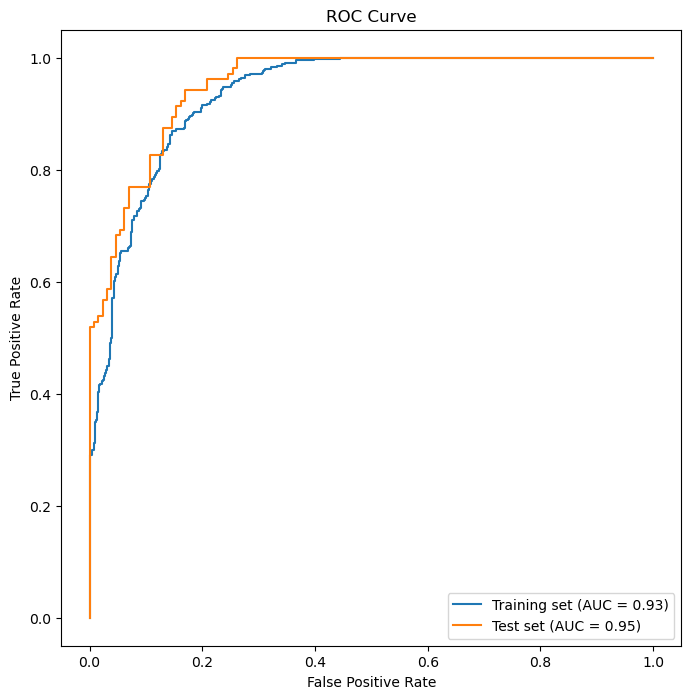

In [24]:
# Predict and evaluate on training set
train_preds = gnb.predict(all_features_train)
train_probs = gnb.predict_proba(all_features_train)[:, 1]

# Predict and evaluate on test set
test_preds = gnb.predict(all_features_test)
test_probs = gnb.predict_proba(all_features_test)[:, 1]

# Calculate and display confusion matrix and ROC AUC score for training set
train_conf_matrix = confusion_matrix(lbls_train, train_preds, normalize='true')
train_roc_auc = roc_auc_score(lbls_train, train_probs)
train_fpr, train_tpr, _ = roc_curve(lbls_train, train_probs)

# Calculate and display confusion matrix and ROC AUC score for test set
test_conf_matrix = confusion_matrix(lbls_test, test_preds, normalize='true')
test_roc_auc = roc_auc_score(lbls_test, test_probs)
test_fpr, test_tpr, _ = roc_curve(lbls_test, test_probs)

print("Training set confusion matrix:\n", train_conf_matrix)
print("Training set ROC AUC score:", train_roc_auc)
print("Test set confusion matrix:\n", test_conf_matrix)
print("Test set ROC AUC score:", test_roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(train_fpr, train_tpr, label=f'Training set (AUC = {train_roc_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test set (AUC = {test_roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()